In [2]:
from keras import models
from keras import layers
from keras import optimizers
from keras.models import load_model
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

Using TensorFlow backend.


In [3]:
crime_data = pd.DataFrame()

In [4]:
def load_crime_data():
    crime_data = pd.read_csv(r"D:\Data Science\deep learning\assignment-1\communities.data", header=None)
    
    return (crime_data)

crime_data = load_crime_data()

In [5]:
crime_data.head()

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,...,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
1,53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,...,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
2,24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,...,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
3,34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,...,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
4,42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,...,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03


In [6]:
#crime_data.shape
features = crime_data.iloc[:,:-1]
label = crime_data.iloc[:,-1:]
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size = 0.2)

In [7]:
x_train.shape,y_train.shape

((1595, 127), (1595, 1))

In [8]:
x_test.shape,y_test.shape

((399, 127), (399, 1))

In [276]:
x_train.head()

,0,1,2,3,4,5,6,7,8,9,...,117,118,119,120,121,122,123,124,125,126
380,42,11,63624,Readingcity,2,0.11,0.36,0.19,0.68,0.09,...,0.59,0.03,0.67,0.41,0.04,0.02,0.67,1,0.65,0.14
1212,42,133,53224,Newberrytownship,7,0.00,0.50,0.01,0.99,0.02,...,?,0.09,0.03,0.00,?,?,?,?,0.00,?
852,42,121,56456,OilCitycity,5,0.00,0.33,0.01,0.99,0.02,...,?,0.01,0.22,0.03,?,?,?,?,0.00,?
1359,54,?,?,Martinsburgcity,7,0.01,0.27,0.17,0.85,0.03,...,?,0.01,0.26,0.11,?,?,?,?,0.00,?
1875,6,?,?,LaHabracity,10,0.07,0.53,0.02,0.64,0.25,...,?,0.02,0.59,0.10,?,?,?,?,0.00,?


In [9]:
delete_column = []
for column in x_train:
    if ((x_train[x_train[column]=="?"].shape[0]/(x_train.shape[0]))*100 > 50):
        delete_column.append(column)        

C:\Users\kapil\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [10]:
x_train_copy = x_train.copy()

In [11]:
x_test_copy = x_test.copy() 

In [12]:
x_train.shape

(1595, 127)

In [13]:
x_train_copy.drop(x_train.columns[delete_column],axis=1,inplace=True)

In [14]:
x_train_copy.shape

(1595, 103)

In [15]:
x_test_copy = x_test_copy[x_train_copy.columns]

In [16]:
x_test_copy.shape,x_train_copy.shape

((399, 103), (1595, 103))

In [17]:
x_train_copy = x_train_copy.replace('?',np.nan)

In [18]:
x_test_copy = x_test_copy.replace('?',np.nan)

In [19]:
for column in x_train_copy:
    if x_train_copy[x_train_copy[column].isna()][column].shape[0] != 0:
        x_train_copy[column].fillna(x_train_copy[column].astype('float32').mean(),inplace =True)

In [20]:
x_train_copy.head()

,0,3,4,5,6,7,8,9,10,11,...,95,96,97,98,99,100,118,119,120,125
894,5,Conwaycity,5,0.03,0.52,0.20,0.83,0.04,0.01,0.88,...,0.0,0.03,0.71,0.31,0.34,0.68,0.07,0.09,0.01,0.0
1245,19,Ankenycity,7,0.01,0.48,0.01,0.99,0.03,0.01,0.54,...,0.0,0.01,0.81,0.39,0.52,0.76,0.04,0.12,0.01,0.0
679,55,NewBerlincity,4,0.04,0.55,0.00,0.98,0.06,0.01,0.38,...,0.0,0.08,0.83,0.72,0.54,0.82,0.11,0.08,0.04,0.0
1361,48,Beltoncity,7,0.00,0.60,0.17,0.64,0.05,0.41,0.57,...,0.0,0.16,0.73,0.44,0.56,0.76,0.03,0.10,0.01,0.0
566,47,Clevelandcity,3,0.03,0.37,0.14,0.88,0.03,0.02,0.49,...,0.0,0.04,0.64,0.47,0.63,0.55,0.06,0.13,0.00,0.0


In [21]:
for column in x_test_copy:
    if x_test_copy[x_test_copy[column].isna()][column].shape[0] != 0:
        x_test_copy[column].fillna(x_train_copy[column].astype('float32').mean(),inplace =True)

In [22]:
x_test_copy.head()

,0,3,4,5,6,7,8,9,10,11,...,95,96,97,98,99,100,118,119,120,125
203,6,Artesiacity,2,0.01,0.89,0.05,0.33,1.00,0.74,0.52,...,0.00,1.00,0.37,0.58,0.76,0.68,0.00,0.80,0.07,0.00
1022,6,Livermorecity,6,0.08,0.49,0.03,0.84,0.28,0.18,0.39,...,0.00,0.19,0.56,0.45,0.62,0.73,0.05,0.24,0.09,0.00
465,8,CanonCitycity,3,0.00,0.36,0.03,0.94,0.02,0.14,0.32,...,0.00,0.05,0.46,0.46,0.54,0.66,0.02,0.13,0.00,0.00
1626,9,NewBritaintown,9,0.11,0.36,0.15,0.72,0.11,0.30,0.39,...,0.02,0.49,0.55,0.54,0.73,0.65,0.04,0.47,0.17,0.72
199,37,Lexingtoncity,1,0.01,0.29,0.58,0.52,0.09,0.01,0.42,...,0.00,0.06,0.80,0.62,0.77,0.73,0.03,0.11,0.02,0.00


In [23]:
x_train_copy.head()

,0,3,4,5,6,7,8,9,10,11,...,95,96,97,98,99,100,118,119,120,125
894,5,Conwaycity,5,0.03,0.52,0.20,0.83,0.04,0.01,0.88,...,0.0,0.03,0.71,0.31,0.34,0.68,0.07,0.09,0.01,0.0
1245,19,Ankenycity,7,0.01,0.48,0.01,0.99,0.03,0.01,0.54,...,0.0,0.01,0.81,0.39,0.52,0.76,0.04,0.12,0.01,0.0
679,55,NewBerlincity,4,0.04,0.55,0.00,0.98,0.06,0.01,0.38,...,0.0,0.08,0.83,0.72,0.54,0.82,0.11,0.08,0.04,0.0
1361,48,Beltoncity,7,0.00,0.60,0.17,0.64,0.05,0.41,0.57,...,0.0,0.16,0.73,0.44,0.56,0.76,0.03,0.10,0.01,0.0
566,47,Clevelandcity,3,0.03,0.37,0.14,0.88,0.03,0.02,0.49,...,0.0,0.04,0.64,0.47,0.63,0.55,0.06,0.13,0.00,0.0


In [24]:
x_train_copy = x_train_copy.drop([3],axis=1)

In [25]:
x_train_copy.head()

,0,4,5,6,7,8,9,10,11,12,...,95,96,97,98,99,100,118,119,120,125
894,5,5,0.03,0.52,0.20,0.83,0.04,0.01,0.88,0.85,...,0.0,0.03,0.71,0.31,0.34,0.68,0.07,0.09,0.01,0.0
1245,19,7,0.01,0.48,0.01,0.99,0.03,0.01,0.54,0.64,...,0.0,0.01,0.81,0.39,0.52,0.76,0.04,0.12,0.01,0.0
679,55,4,0.04,0.55,0.00,0.98,0.06,0.01,0.38,0.38,...,0.0,0.08,0.83,0.72,0.54,0.82,0.11,0.08,0.04,0.0
1361,48,7,0.00,0.60,0.17,0.64,0.05,0.41,0.57,0.59,...,0.0,0.16,0.73,0.44,0.56,0.76,0.03,0.10,0.01,0.0
566,47,3,0.03,0.37,0.14,0.88,0.03,0.02,0.49,0.54,...,0.0,0.04,0.64,0.47,0.63,0.55,0.06,0.13,0.00,0.0


In [26]:
x_test_copy = x_test_copy.drop([3],axis=1)

In [27]:
x_test_copy.head()

,0,4,5,6,7,8,9,10,11,12,...,95,96,97,98,99,100,118,119,120,125
203,6,2,0.01,0.89,0.05,0.33,1.00,0.74,0.52,0.56,...,0.00,1.00,0.37,0.58,0.76,0.68,0.00,0.80,0.07,0.00
1022,6,6,0.08,0.49,0.03,0.84,0.28,0.18,0.39,0.49,...,0.00,0.19,0.56,0.45,0.62,0.73,0.05,0.24,0.09,0.00
465,8,3,0.00,0.36,0.03,0.94,0.02,0.14,0.32,0.33,...,0.00,0.05,0.46,0.46,0.54,0.66,0.02,0.13,0.00,0.00
1626,9,9,0.11,0.36,0.15,0.72,0.11,0.30,0.39,0.57,...,0.02,0.49,0.55,0.54,0.73,0.65,0.04,0.47,0.17,0.72
199,37,1,0.01,0.29,0.58,0.52,0.09,0.01,0.42,0.45,...,0.00,0.06,0.80,0.62,0.77,0.73,0.03,0.11,0.02,0.00


In [28]:
x_train_copy = x_train_copy.astype('float64')
x_test_copy = x_test_copy.astype('float64')
train_mean = x_train_copy.mean(axis=0)
train_std = x_train_copy.std(axis=0)
x_train_final = (x_train_copy - train_mean)/train_std
x_test_final = (x_test_copy - train_mean)/train_std

In [29]:
x_train_final.head()

,0,4,5,6,7,8,9,10,11,12,...,95,96,97,98,99,100,118,119,120,125
894,-1.455654,-0.150733,-0.212860,0.323221,0.071896,0.316669,-0.550049,-0.576225,2.825311,2.403108,...,-0.222654,-0.798569,0.485150,-1.218431,-1.380712,0.146356,0.047551,-0.693887,-0.659632,-0.389151
1245,-0.604588,0.546134,-0.371031,0.082989,-0.677094,0.976267,-0.599479,-0.576225,0.699281,0.974423,...,-0.222654,-0.886077,0.975371,-0.780815,-0.501829,0.545395,-0.232316,-0.547769,-0.659632,-0.389151
679,1.583867,-0.499167,-0.133775,0.503396,-0.716515,0.935042,-0.451190,-0.576225,-0.301204,-0.794425,...,-0.222654,-0.579800,1.073415,1.024350,-0.404176,0.844675,0.420707,-0.742594,-0.528473,-0.389151
1361,1.158334,0.546134,-0.450116,0.803686,-0.046365,-0.466604,-0.500620,1.142482,0.886872,0.634260,...,-0.222654,-0.229769,0.583194,-0.507305,-0.306522,0.545395,-0.325605,-0.645181,-0.659632,-0.389151
566,1.097543,-0.847600,-0.212860,-0.577649,-0.164627,0.522793,-0.599479,-0.533257,0.386629,0.294097,...,-0.222654,-0.754815,0.141995,-0.343199,0.035266,-0.502083,-0.045738,-0.499063,-0.703352,-0.389151


In [41]:
def create_model():
  model = models.Sequential()
  model.add(layers.Dense(64, input_shape=(102,) , activation = 'relu'))
  model.add(layers.Dense(16, activation = 'relu'))
  #model.add(tf.keras.layers.Dense(10, activation = 'relu'))
  model.add(layers.Dense(1))
  model.compile(loss = 'mse' , optimizer = 'rmsprop' , metrics = ['mae'] )
  return model

In [31]:
x_train_final.shape
x_test_final.shape

(399, 102)

In [352]:
'''
from sklearn.model_selection import KFold
k=4
for train_index,test_index in KFold(k).split(x_train_final):
  #print (train_index)
  #print (test_index.shape)  
  X_train,X_test=x_train_final.iloc[train_index],x_train_final.iloc[test_index]
  Y_train,Y_test=y_train.iloc[train_index],y_train.iloc[test_index]
  #print (X_train.shape, Y_train.shape)
  print (X_test.shape, Y_test.shape) 

  model=create_model()
  model.fit(X_train, Y_train,epochs=20,verbose=0)
  
  print('Model evaluation ',model.evaluate(X_test,Y_test))
''' 

(399, 104) (399, 1)
399/399 [==============================] - 0s 60us/step
Model evaluation  [0.04437068224718846, 0.15938614308834076]
(399, 104) (399, 1)
399/399 [==============================] - 0s 60us/step
Model evaluation  [0.05120213124854373, 0.16857606172561646]
(398, 104) (398, 1)
398/398 [==============================] - 0s 68us/step
Model evaluation  [0.04935071516276604, 0.15802070498466492]
(398, 104) (398, 1)
398/398 [==============================] - 0s 58us/step
Model evaluation  [0.11116234359130188, 0.2626813054084778]


In [32]:
type(x_train_final)

pandas.core.frame.DataFrame

In [42]:
k=4
num_val_samples = len(x_train_final)//k
num_epochs = 15
all_scores = []
all_mae_histories = []
all_val_mae_history = []
#k-fold cross validation
for i in range(k):
    print ("processing for #",i)
    #prepare validation fold 
    val_data = x_train_final[i*num_val_samples: (i+1)*num_val_samples]
    val_target = y_train[i*num_val_samples: (i+1)*num_val_samples]
    
    # concatenate training folds
    partial_train_data = np.concatenate([x_train_final[:i*num_val_samples],x_train_final[(i+1)*num_val_samples:]],
                                       axis=0)
    partial_train_targets = np.concatenate([y_train[:i*num_val_samples],y_train[(i+1)*num_val_samples:]],
                                       axis=0)
    
    model = create_model()
    history = model.fit(partial_train_data, partial_train_targets, epochs=num_epochs, batch_size=1,validation_data=(val_data,val_target))
    #print (history.history)
    mae_history = history.history['mae']
    val_mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    all_val_mae_history.append(val_mae_history)
    val_mse, val_mae = model.evaluate(val_data, val_target)
    all_scores.append(val_mae)
    

processing for # 0
Train on 1197 samples, validate on 398 samples
Epoch 1/15
1197/1197 [==============================] - 2s 2ms/step - loss: 0.0804 - mae: 0.1874 - val_loss: 0.0364 - val_mae: 0.1277
Epoch 2/15
1197/1197 [==============================] - 2s 1ms/step - loss: 0.0253 - mae: 0.1080 - val_loss: 0.0310 - val_mae: 0.1214
Epoch 3/15
1197/1197 [==============================] - 2s 1ms/step - loss: 0.0196 - mae: 0.0928 - val_loss: 0.0261 - val_mae: 0.1100
Epoch 4/15
1197/1197 [==============================] - 2s 1ms/step - loss: 0.0195 - mae: 0.0919 - val_loss: 0.0230 - val_mae: 0.1038
Epoch 5/15
1197/1197 [==============================] - 2s 1ms/step - loss: 0.0171 - mae: 0.0866 - val_loss: 0.0226 - val_mae: 0.0999
Epoch 6/15
1197/1197 [==============================] - 2s 1ms/step - loss: 0.0163 - mae: 0.0842 - val_loss: 0.0258 - val_mae: 0.1071
Epoch 7/15
1197/1197 [==============================] - 2s 1ms/step - loss: 0.0168 - mae: 0.0851 - val_loss: 0.0236 - val_mae: 0.1

Epoch 14/15
1197/1197 [==============================] - 2s 1ms/step - loss: 0.0123 - mae: 0.0732 - val_loss: 0.0220 - val_mae: 0.0951
Epoch 15/15
398/398 [==============================] - 0s 30us/step


In [43]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
average_val_mae_history = [np.mean([x[i] for x in all_val_mae_history]) for i in range(num_epochs)]

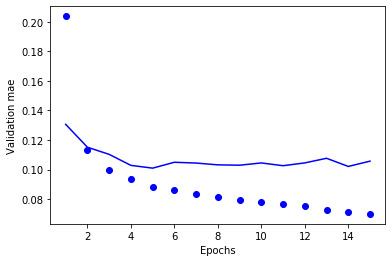

In [44]:
import matplotlib.pyplot as plt
plt.plot(range(1,len(average_mae_history)+1), average_mae_history,'bo',label='Training mae')
plt.plot(range(1,len(average_val_mae_history)+1), average_val_mae_history,'b',label='Validation mae')
plt.xlabel('Epochs')
plt.ylabel('Validation mae')
plt.show()

In [50]:
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(102,) , activation = 'relu'))
model.add(layers.Dense(16, activation = 'relu'))
#model.add(tf.keras.layers.Dense(10, activation = 'relu'))
model.add(layers.Dense(1))
model.compile(loss = 'mse' , optimizer = 'rmsprop' , metrics = ['mae'] )
model.fit(x_train_final, y_train, epochs=5, batch_size=1)    

Epoch 1/5
1595/1595 [==============================] - 2s 1ms/step - loss: 0.0874 - mae: 0.1761
Epoch 2/5
1595/1595 [==============================] - 2s 1ms/step - loss: 0.0239 - mae: 0.1035
Epoch 3/5
1595/1595 [==============================] - 2s 1ms/step - loss: 0.0196 - mae: 0.0936
Epoch 4/5
1595/1595 [==============================] - 2s 1ms/step - loss: 0.0174 - mae: 0.0897
Epoch 5/5
1595/1595 [==============================] - 2s 1ms/step - loss: 0.0177 - mae: 0.0888


In [51]:
model.evaluate(x_test_final,y_test)

399/399 [==============================] - 0s 70us/step


[0.018765524568918505, 0.09377798438072205]

In [52]:
model.save(r"D:\Data Science\deep learning\assignment-1\Q3-model.h5")

In [57]:
loaded_model = load_model(r"D:\Data Science\deep learning\assignment-1\Q3-model.h5")

In [58]:
loaded_model.evaluate(x_test_final,y_test)

399/399 [==============================] - 0s 70us/step


[0.018765524568918505, 0.09377798438072205]